# Goftest
GoFTest tutorial macro

Using Anderson-Darling and Kolmogorov-Smirnov goodness of fit tests
1 sample test is performed comparing data with a log-normal distribution
and a 2 sample test is done comparing two gaussian data sets.




**Author:** Bartolomeu Rabacal  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:07 AM.</small></i>

In [1]:
%%cpp -d
#include <cassert>
#include "TCanvas.h"
#include "TPaveText.h"
#include "TH1.h"
#include "TF1.h"
#include "Math/GoFTest.h"
#include "Math/Functor.h"
#include "TRandom3.h"
#include "Math/DistFunc.h"

  need to use Functor1D
 

In [2]:
%%cpp -d
double landau(double x) {
   return ROOT::Math::landau_pdf(x);
}

------------------------------------------------------------------------
 Case 1: Create logNormal random sample

In [3]:
UInt_t nEvents1 = 1000;

Root::math::random<root::math::gslrngmt> r;

In [4]:
TF1 * f1 = new TF1("logNormal","ROOT::Math::lognormal_pdf(x,[0],[1])",0,500);

Set the lognormal parameters (m and s)

In [5]:
f1->SetParameters(4.0,1.0);
f1->SetNpx(1000);


Double_t* sample1 = new Double_t[nEvents1];

TH1D* h1smp = new TH1D("h1smp", "LogNormal distribution histogram", 100, 0, 500);
h1smp->SetStats(kFALSE);

for (UInt_t i = 0; i < nEvents1; ++i) {
   //Double_t data = f1->GetRandom();
   Double_t data = gRandom->Gaus(4,1);
   data = TMath::Exp(data);
   sample1[i] = data;
   h1smp->Fill(data);
}

Normalize correctly the histogram using the entries inside

In [6]:
h1smp->Scale( ROOT::Math::lognormal_cdf(500.,4.,1) / nEvents1, "width");

TCanvas* c = new TCanvas("c","1-Sample and 2-Samples GoF Tests");
c->Divide(1, 2);
TPad * pad = (TPad *)c->cd(1);
h1smp->Draw();
h1smp->SetLineColor(kBlue);
pad->SetLogy();
f1->SetNpx(100); // use same points as histo for drawing
f1->SetLineColor(kRed);
f1->Draw("SAME");

-----------------------------------------
 Create GoFTest object

In [7]:
ROOT::Math::GoFTest* goftest_1 = new ROOT::Math::GoFTest(nEvents1, sample1, ROOT::Math::GoFTest::kLogNormal);

----------------------------------------------------
 Possible calls for the Anderson - DarlingTest test 
 a) Returning the Anderson-Darling standardized test statistic 

In [8]:
Double_t A2_1 = goftest_1-> AndersonDarlingTest("t");
Double_t A2_2 = (*goftest_1)(ROOT::Math::GoFTest::kAD, "t");
assert(A2_1 == A2_2);

B) returning the p-value for the anderson-darling test statistic 

In [9]:
Double_t pvalueAD_1 = goftest_1-> AndersonDarlingTest(); // p-value is the default choice
Double_t pvalueAD_2 = (*goftest_1)(); // p-value and Anderson - Darling Test are the default choices
assert(pvalueAD_1 == pvalueAD_2);

Rebuild the test using the default 1-sample construtor 

In [10]:
delete goftest_1;
goftest_1 = new ROOT::Math::GoFTest(nEvents1, sample1 ); // User must then input a distribution type option
goftest_1->SetDistribution(ROOT::Math::GoFTest::kLogNormal);

--------------------------------------------------
 Possible calls for the Kolmogorov - Smirnov test 
 a) Returning the Kolmogorov-Smirnov standardized test statistic 

In [11]:
Double_t Dn_1 = goftest_1-> KolmogorovSmirnovTest("t");
Double_t Dn_2 = (*goftest_1)(ROOT::Math::GoFTest::kKS, "t");
assert(Dn_1 == Dn_2);

B) returning the p-value for the kolmogorov-smirnov test statistic 

In [12]:
Double_t pvalueKS_1 = goftest_1-> KolmogorovSmirnovTest();
Double_t pvalueKS_2 = (*goftest_1)(ROOT::Math::GoFTest::kKS);
assert(pvalueKS_1 == pvalueKS_2);

Valid but incorrect calls for the 2-samples methods of the 1-samples constructed goftest_1

In [13]:
#ifdef TEST_ERROR_MESSAGE
 Double_t A2 = (*goftest_1)(ROOT::Math::GoFTest::kAD2s, "t");     // Issues error message
 Double_t pvalueKS = (*goftest_1)(ROOT::Math::GoFTest::kKS2s);    // Issues error message
 assert(A2 == pvalueKS);
#endif

TPaveText* pt1 = new TPaveText(0.58, 0.6, 0.88, 0.80, "brNDC");
Char_t str1[50];
sprintf(str1, "p-value for A-D 1-smp test: %f", pvalueAD_1);
pt1->AddText(str1);
pt1->SetFillColor(18);
pt1->SetTextFont(20);
pt1->SetTextColor(4);
Char_t str2[50];
sprintf(str2, "p-value for K-S 1-smp test: %f", pvalueKS_1);
pt1->AddText(str2);
pt1->Draw();

------------------------------------------------------------------------
 Case 2: Create Gaussian random samples

In [14]:
  
UInt_t nEvents2 = 2000;

Double_t* sample2 = new Double_t[nEvents2];

TH1D* h2smps_1 = new TH1D("h2smps_1", "Gaussian distribution histograms", 100, 0, 500);
h2smps_1->SetStats(kFALSE);

TH1D* h2smps_2 = new TH1D("h2smps_2", "Gaussian distribution histograms", 100, 0, 500);
h2smps_2->SetStats(kFALSE);

TRandom3 r;
for (UInt_t i = 0; i < nEvents1; ++i) {
   Double_t data = r.Gaus(300, 50);
   sample1[i] = data;
   h2smps_1->Fill(data);
}
h2smps_1->Scale(1. / nEvents1, "width");
c->cd(2);
h2smps_1->Draw();
h2smps_1->SetLineColor(kBlue);

for (UInt_t i = 0; i < nEvents2; ++i) {
   Double_t data = r.Gaus(300, 50);
   sample2[i] = data;
   h2smps_2->Fill(data);
}
h2smps_2->Scale(1. / nEvents2, "width");
h2smps_2->Draw("SAME");
h2smps_2->SetLineColor(kRed);

-----------------------------------------
 Create GoFTest object

In [15]:
ROOT::Math::GoFTest* goftest_2 = new ROOT::Math::GoFTest(nEvents1, sample1, nEvents2, sample2);

   //----------------------------------------------------

Possible calls for the anderson - darlingtest test 
 a) Returning the Anderson-Darling standardized test statistic

In [16]:
A2_1 = goftest_2->AndersonDarling2SamplesTest("t");
A2_2 = (*goftest_2)(ROOT::Math::GoFTest::kAD2s, "t");
assert(A2_1 == A2_2);

B) returning the p-value for the anderson-darling test statistic 

In [17]:
pvalueAD_1 = goftest_2-> AndersonDarling2SamplesTest(); // p-value is the default choice
pvalueAD_2 = (*goftest_2)(ROOT::Math::GoFTest::kAD2s);  // p-value is the default choices
assert(pvalueAD_1 == pvalueAD_2);

--------------------------------------------------
 Possible calls for the Kolmogorov - Smirnov test 
 a) Returning the Kolmogorov-Smirnov standardized test statistic 

In [18]:
Dn_1 = goftest_2-> KolmogorovSmirnov2SamplesTest("t");
Dn_2 = (*goftest_2)(ROOT::Math::GoFTest::kKS2s, "t");
assert(Dn_1 == Dn_2);

B) returning the p-value for the kolmogorov-smirnov test statistic 

In [19]:
pvalueKS_1 = goftest_2-> KolmogorovSmirnov2SamplesTest();
pvalueKS_2 = (*goftest_2)(ROOT::Math::GoFTest::kKS2s);
assert(pvalueKS_1 == pvalueKS_2);

#ifdef TEST_ERROR_MESSAGE
/* Valid but incorrect calls for the 1-sample methods of the 2-samples constucted goftest_2 */
A2 = (*goftest_2)(ROOT::Math::GoFTest::kAD, "t");     // Issues error message
pvalueKS = (*goftest_2)(ROOT::Math::GoFTest::kKS);    // Issues error message
assert(A2 == pvalueKS);
#endif

TPaveText* pt2 = new TPaveText(0.13, 0.6, 0.43, 0.8, "brNDC");
sprintf(str1, "p-value for A-D 2-smps test: %f", pvalueAD_1);
pt2->AddText(str1);
pt2->SetFillColor(18);
pt2->SetTextFont(20);
pt2->SetTextColor(4);
sprintf(str2, "p-value for K-S 2-smps test: %f", pvalueKS_1);
pt2-> AddText(str2);
pt2-> Draw();

------------------------------------------------------------------------
 Case 3: Create Landau random sample

In [20]:
UInt_t nEvents3 = 1000;

Double_t* sample3 = new Double_t[nEvents3];
for (UInt_t i = 0; i < nEvents3; ++i) {
   Double_t data = r.Landau();
   sample3[i] = data;
}

------------------------------------------
 Create GoFTest objects

 Possible constructors for the user input distribution 

A) user input pdf 

In [21]:
ROOT::Math::Functor1D f(&landau);
double minimum = 3*TMath::MinElement(nEvents3, sample3);
double maximum = 3*TMath::MaxElement(nEvents3, sample3);
ROOT::Math::GoFTest* goftest_3a = new ROOT::Math::GoFTest(nEvents3, sample3, f,  ROOT::Math::GoFTest::kPDF, minimum,maximum);  // need to specify am interval

B) user input cdf 

In [22]:
ROOT::Math::Functor1D fI(&TMath::LandauI);
ROOT::Math::GoFTest* goftest_3b = new ROOT::Math::GoFTest(nEvents3, sample3, fI, ROOT::Math::GoFTest::kCDF,minimum,maximum);

Returning the p-value for the anderson-darling test statistic 

In [23]:
pvalueAD_1 = goftest_3a-> AndersonDarlingTest(); // p-value is the default choice

pvalueAD_2 = (*goftest_3b)(); // p-value and Anderson - Darling Test are the default choices

Checking consistency between both tests 

In [24]:
std::cout << " \n\nTEST with LANDAU distribution:\t";
if (TMath::Abs(pvalueAD_1 - pvalueAD_2) > 1.E-1 * pvalueAD_2) {
   std::cout << "FAILED " << std::endl;
   Error("goftest","Error in comparing testing using Landau and Landau CDF");
   std::cerr << " pvalues are " << pvalueAD_1 << "  " << pvalueAD_2 << std::endl;
}
else
   std::cout << "OK ( pvalues = " << pvalueAD_2 << "  )" << std::endl;

 

TEST with LANDAU distribution:	OK ( pvalues = 0.777278  )


Draw all canvases 

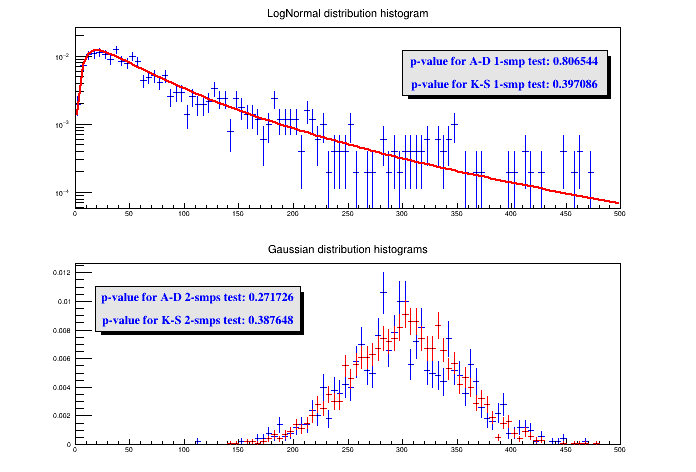

In [25]:
gROOT->GetListOfCanvases()->Draw()